In [39]:
%load_ext autoreload
%autoreload 2

import sys, os, cv2
sys.path.append("../") # go to parent dir

import warnings
warnings.filterwarnings("ignore")

import json
from PIL import Image
import torch
from torchvision import transforms
from torchvision import models
import numpy as np
import glob
import time

from utils import data_processor
from models.base_cfg import ssd300_cfg as cfg
from models.base_cfg import ML_WEIGHTS_PATH, DS01_CLASSES

import matplotlib.pyplot as plt 
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
!ls -lh '/home/redne/mnt/project_zero/pytorch/weights/'

total 264M
-rwxrwxrwx 1 root root 93M May 31 20:27 dev2_ssd300_10_053120.pth
-rwxrwxrwx 1 root root 93M May 31 19:41 dev_ssd300_10_053120.pth
-rwxrwxrwx 1 root root 79M May 31 12:37 vgg16_reducedfc.pth


In [49]:
from utils import ssd

# get device ( cpu / gpu ) to be used
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(f'device : {device}')



net = ssd.build_ssd(phase="test",num_classes=cfg['num_classes'])
net_weights = torch.load(os.path.join(ML_WEIGHTS_PATH, 'dev_ssd300_10_053120.pth'), map_location='cpu')#device)
net.vgg.load_state_dict(vgg_weights)


device : cuda


<All keys matched successfully>

In [50]:
sample = ['/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter77_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg',
 '/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter446_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg']

In [51]:
image_file_path = sample[0]
img = cv2.imread(image_file_path)  
img.shape

(1080, 1920, 3)

cpu
/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter77_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg


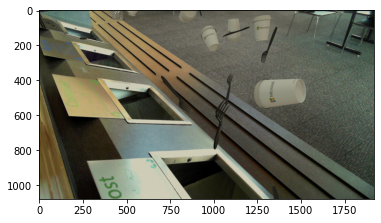

torch.Size([1, 6, 200, 5])
torch.Size([3, 300, 300])


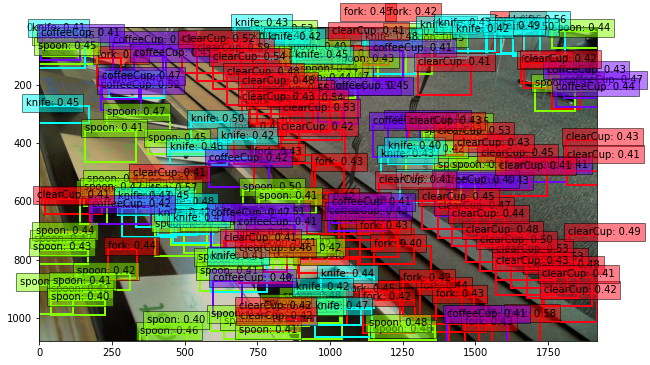

In [56]:
from utils.data_processor import VOC_DataTransform as DataTransform
import glob
from utils.ssd_eval import SSDPredictShow

image_file_path = sample[0] # "./sample/sample.jpg"
voc_classes =  ['fork', 'spoon', 'knife', 'coffeeCup', 'clearCup']

ssd_nn = SSDPredictShow(eval_categories=voc_classes, net=net, image_size=300, device='cpu')

for imp in glob.glob(image_file_path):
    print(imp)
    img = cv2.imread(imp)
    height, width, channels = img.shape

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


    color_mean = (104, 117, 123)
    input_size = 300  
    transform = DataTransform(input_size, color_mean)


    phase = "val"
    img_transformed, boxes, labels = transform(img, phase, "", "")  
    img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)


    net.eval()  
    x = img.unsqueeze(0)
    detections = net(x)

    print(detections.shape)
    #print(detections)


    ssd_nn.show(imp, data_confidence_level=0.4)

In [57]:
ML_WEIGHTS_PATH

'/home/redne/mnt/project_zero/pytorch/weights/'

cpu
/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter0_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


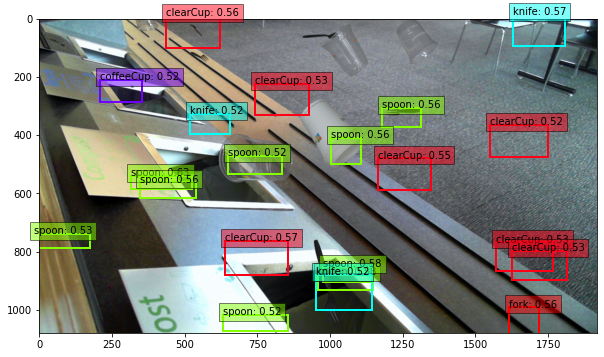

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter100_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


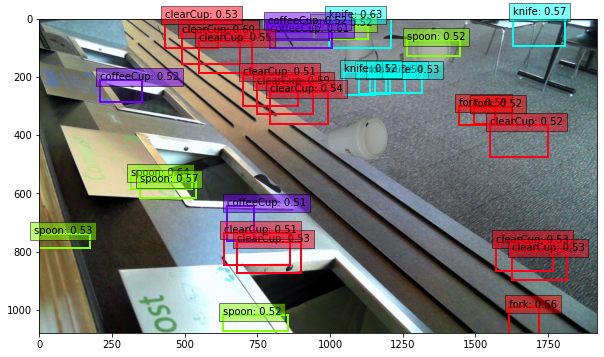

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter101_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


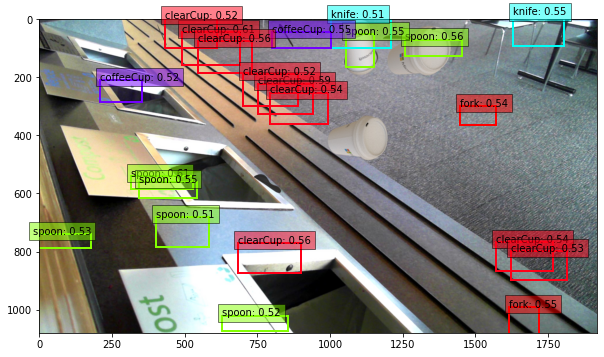

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter102_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


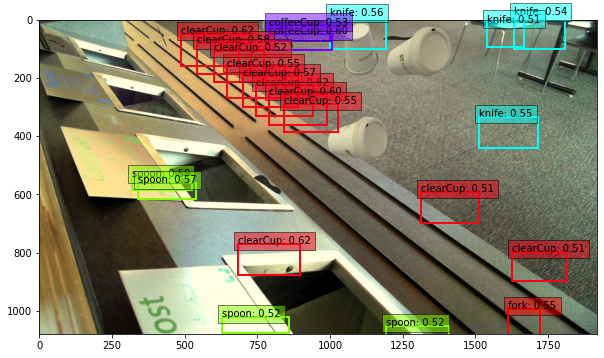

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter103_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


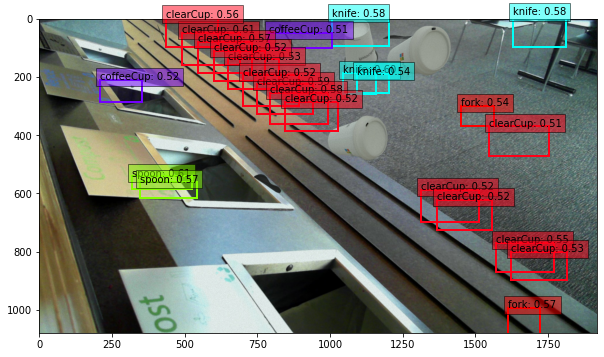

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter104_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


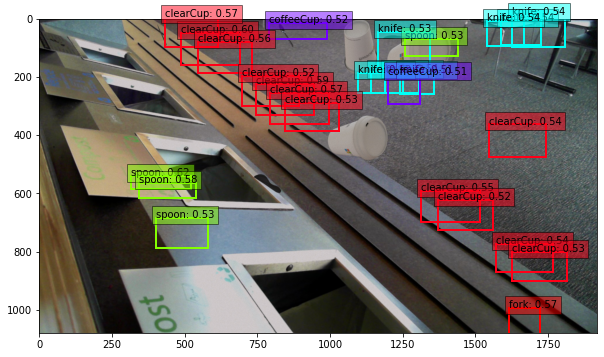

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter105_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


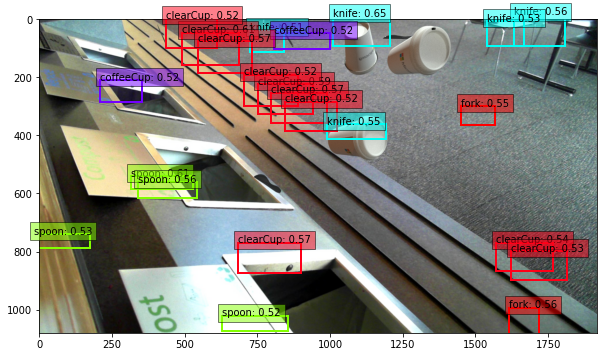

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter106_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
torch.Size([3, 300, 300])


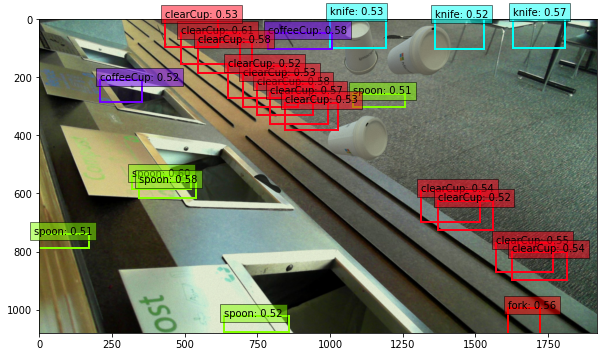

In [61]:
image_file_path ='/home/redne/mnt/project_zero/project_zero/ds1/parsed/'

ssd = SSDPredictShow(eval_categories=voc_classes, net=net, image_size=300, device="cpu")#device="cuda")

for imp in glob.glob(image_file_path+"*.jpg")[:8]:
    print(imp)
    img = cv2.imread(imp)
    height, width, channels = img.shape 
    ssd.show(imp, data_confidence_level=0.51)
    plt.show()